<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/PPG_Clustering/blob/main/ppg_clustering_complete_2_pca_and_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import time

In [3]:
# variables declearation 

ppgData = pd.DataFrame()   # to store dataFrame from files like 1.csv
featureDf = pd.DataFrame()  # to store all features like PCA and Systolic and Diastolic of all data
ppg_pca = pd.DataFrame()    # to store all pca of all data 
ABP_sys_dia = pd.DataFrame() # to store all systolic and diastolic obtained from ABP signals of all data



In [4]:
data = pd.read_csv("/content/gdrive/MyDrive/data/sys_dia_pca1_pca2.csv")

In [5]:
data["sys_dia"] = data["systolic"] / data['diastolic']

In [6]:
data.head()

,Unnamed: 0,systolic,diastolic,pca1,pca2,sys_dia
0,0,144.43,52.947,0.448304,0.068589,2.727822
1,1,144.43,52.947,0.108880,-0.028446,2.727822
2,2,143.36,52.752,0.464056,0.471354,2.717622
3,3,146.48,54.998,-0.089028,-0.016251,2.663370
4,4,177.11,65.060,-0.213127,0.035350,2.722256


In [8]:
data.shape

(205851, 3)

In [7]:

data = data.drop("diastolic",axis = 1)
data = data.drop("systolic",axis = 1)
data = data.drop("Unnamed: 0",axis = 1)

In [9]:

data.head()

,pca1,pca2,sys_dia
0,0.448304,0.068589,2.727822
1,0.108880,-0.028446,2.727822
2,0.464056,0.471354,2.717622
3,-0.089028,-0.016251,2.663370
4,-0.213127,0.035350,2.722256


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205851 entries, 0 to 205850
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   pca1     205851 non-null  float64
 1   pca2     205851 non-null  float64
 2   sys_dia  205851 non-null  float64
dtypes: float64(3)
memory usage: 4.7 MB


In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


 
# initialise kmeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(data)
cluster_labels = kmeans.labels_


In [12]:
np.unique(cluster_labels)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [15]:
print("number of datasets of cluster 0 = ",cluster_labels[cluster_labels == 0].shape[0])
print("number of datasets of cluster 1 = ",cluster_labels[cluster_labels == 1].shape[0])
print("number of datasets of cluster 2 = ",cluster_labels[cluster_labels == 2].shape[0])
print("number of datasets of cluster 3 = ",cluster_labels[cluster_labels == 3].shape[0])
print("number of datasets of cluster 4 = ",cluster_labels[cluster_labels == 4].shape[0])
print("number of datasets of cluster 5 = ",cluster_labels[cluster_labels == 5].shape[0])


number of datasets of cluster 0 =  16603
number of datasets of cluster 1 =  15969
number of datasets of cluster 2 =  123277
number of datasets of cluster 3 =  17286
number of datasets of cluster 4 =  15885
number of datasets of cluster 5 =  16831


In [34]:
PCA_values = pd.DataFrame()
PCA_values["pca1"] = data['pca1']
PCA_values['pca2'] = data['pca2']


In [35]:
PCA_values.head()

,pca1,pca2
0,0.448304,0.068589
1,0.108880,-0.028446
2,0.464056,0.471354
3,-0.089028,-0.016251
4,-0.213127,0.035350


In [38]:
label0 = PCA_values[cluster_labels == 0]
label0

,pca1,pca2
455,-1.928102,-2.445909
456,-3.631020,-2.402302
482,-2.972059,-1.700744
485,-0.682491,-4.539847
486,-6.002697,-4.438316
...,...,...
205336,-1.794848,-6.711284
205531,-1.369701,-2.693881
205652,-4.944442,-4.538288
205691,-6.771166,-2.832290


In [39]:
label1 = PCA_values[cluster_labels == 1]
label2 = PCA_values[cluster_labels == 2]
label3 = PCA_values[cluster_labels == 3]
label4 = PCA_values[cluster_labels == 4]
label5 = PCA_values[cluster_labels == 5]

In [16]:
import sklearn

sklearn.metrics.davies_bouldin_score(data.values, cluster_labels)

0.715758743503251

In [17]:
sklearn.metrics.calinski_harabasz_score(data.values, cluster_labels)

148963.97221771648

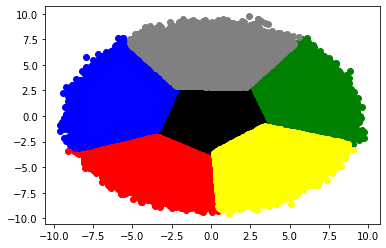

In [40]:
import matplotlib.pyplot as plt 
plt.scatter(label0.values[:,0],label0.values[:,1],color = "red")
plt.scatter(label1.values[:,0],label1.values[:,1],color = "green")
plt.scatter(label2.values[:,0],label2.values[:,1],color = "black")
plt.scatter(label3.values[:,0],label3.values[:,1],color = "blue")
plt.scatter(label4.values[:,0],label4.values[:,1],color = "yellow")
plt.scatter(label5.values[:,0],label5.values[:,1],color = "gray")
plt.show()

In [48]:
all_ppg_2_22 = pd.DataFrame()
for i in range(2,23):
  df = pd.read_csv("/content/gdrive/MyDrive/data/PPG_/"+str(i)+".csv")
  all_ppg_2_22 = pd.concat(objs = [all_ppg_2_22 , df] ,axis = 0,ignore_index = True )
  print(i)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


In [64]:
all_ppg_2_22

,1,2,3,4,5,6,7,8,9,10,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0.626660,0.547210,0.47260,0.406270,0.350510,0.306410,0.27399,0.25228,0.23964,0.23397,...,0.74482,0.82479,0.88590,0.92470,0.93946,0.93015,0.89849,0.84767,0.78203,0.706600
1,0.038500,0.057440,0.08861,0.132970,0.190530,0.260180,0.33985,0.42655,0.51669,0.60637,...,0.05267,0.05805,0.06082,0.06036,0.05660,0.05009,0.04208,0.03443,0.02951,0.029980
2,0.022790,0.024570,0.02600,0.028050,0.032100,0.039810,0.05300,0.07341,0.10256,0.14146,...,0.00840,0.00365,0.00080,0.00000,0.00116,0.00397,0.00790,0.01232,0.01658,0.020160
3,0.245200,0.260090,0.27128,0.278490,0.281820,0.281700,0.27876,0.27377,0.26749,0.26060,...,0.11479,0.11281,0.11491,0.12155,0.13270,0.14788,0.16619,0.18644,0.20725,0.227260
4,0.576570,0.503680,0.42721,0.353030,0.286310,0.231070,0.18983,0.16350,0.15142,0.15160,...,0.37350,0.45685,0.53778,0.61003,0.66785,0.70663,0.72333,0.71686,0.68809,0.639870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205846,0.023608,0.006408,0.00000,0.006105,0.025813,0.059443,0.10642,0.16530,0.23382,0.30909,...,0.36970,0.33777,0.30459,0.26979,0.23327,0.19525,0.15646,0.11807,0.08173,0.049485
205847,0.200210,0.198560,0.19711,0.196190,0.196080,0.197000,0.19914,0.20256,0.20729,0.21327,...,0.18232,0.18736,0.19207,0.19617,0.19946,0.20179,0.20311,0.20346,0.20295,0.201770
205848,0.530510,0.450780,0.37326,0.303230,0.244790,0.200590,0.17170,0.15766,0.15674,0.16627,...,0.48017,0.56806,0.64505,0.70563,0.74549,0.76194,0.75419,0.72343,0.67268,0.606510
205849,0.653840,0.675060,0.69403,0.708130,0.715170,0.713620,0.70260,0.68207,0.65270,0.61576,...,0.69176,0.67078,0.64832,0.62748,0.61098,0.60085,0.59826,0.60341,0.61557,0.633120


cluster is  3 index is  2000
cluster is  5 index is  2001
cluster is  1 index is  2003
cluster is  4 index is  2004
cluster is  2 index is  2005


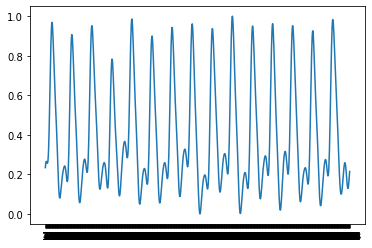

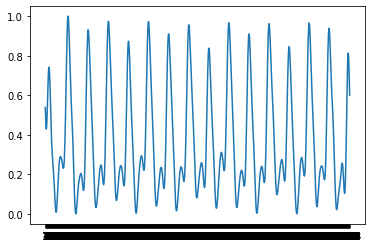

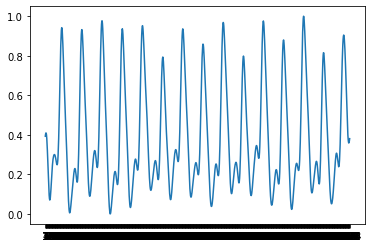

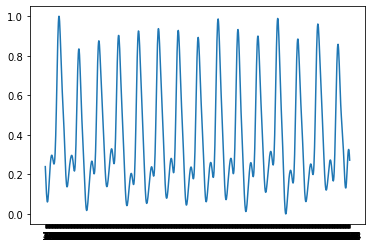

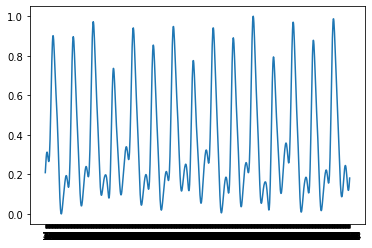

In [63]:
import matplotlib.pyplot as plt
count = 0
lst = [0,1,2,3,4,5]
for i in range(2000,2010):
  if(cluster_labels[i] in lst):
    print("cluster is ",cluster_labels[i],"index is ",i)
    plt.figure(i)
    plt.plot(all_ppg_2_22.loc[i])
    lst.remove(cluster_labels[i])


In [ ]:
all_ppg_2_22.loc[1]

In [69]:
from scipy.spatial.distance import euclidean

# Loop over all clusters and find index of closest point to the cluster center and append to closest_pt_idx list.
closest_pt_idx = []
for iclust in range(kmeans.n_clusters):
    # get all points assigned to each cluster:
    cluster_pts = data.values[kmeans.labels_ == iclust]
    # get all indices of points assigned to this cluster:
    cluster_pts_indices = np.where(kmeans.labels_ == iclust)[0]

    cluster_cen = kmeans.cluster_centers_[iclust]
    min_idx = np.argmin([euclidean(data.values[idx], cluster_cen) for idx in cluster_pts_indices])
    
    # Testing:    
    print('closest point to cluster center: ', cluster_pts[min_idx])
    print('closest index of point to cluster center: ', cluster_pts_indices[min_idx])
    print('  ', data.values[cluster_pts_indices[min_idx]])
    closest_pt_idx.append(cluster_pts_indices[min_idx])

closest point to cluster center:  [-3.14792099 -4.85865911  2.12597857]
closest index of point to cluster center:  28529
   [-3.14792099 -4.85865911  2.12597857]
closest point to cluster center:  [5.62306995 1.65746067 2.06808002]
closest index of point to cluster center:  59218
   [5.62306995 1.65746067 2.06808002]
closest point to cluster center:  [-2.03558485e-03 -1.91474691e-03  2.08078902e+00]
closest index of point to cluster center:  199450
   [-2.03558485e-03 -1.91474691e-03  2.08078902e+00]
closest point to cluster center:  [-5.57530937  1.70503914  2.09483984]
closest index of point to cluster center:  54157
   [-5.57530937  1.70503914  2.09483984]
closest point to cluster center:  [ 3.60181241 -4.51152931  2.0542641 ]
closest index of point to cluster center:  131884
   [ 3.60181241 -4.51152931  2.0542641 ]
closest point to cluster center:  [0.13507747 5.79866547 1.98744501]
closest index of point to cluster center:  139156
   [0.13507747 5.79866547 1.98744501]


cluster is  0


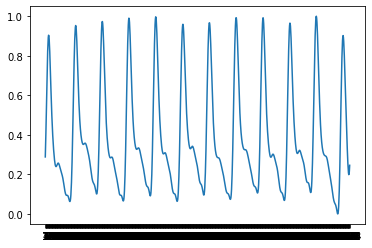

In [76]:
plt.plot(all_ppg_2_22.loc[28529])
print("cluster is ",cluster_labels[28529])

cluster is  1


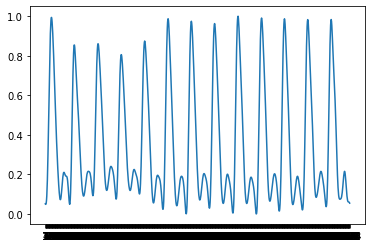

In [77]:
plt.plot(all_ppg_2_22.loc[59218])
print("cluster is ",cluster_labels[59218])

cluster is  2


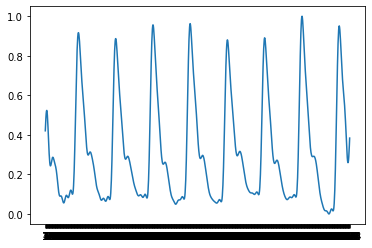

In [78]:
plt.plot(all_ppg_2_22.loc[199450])
print("cluster is ",cluster_labels[199450])

cluster is  3


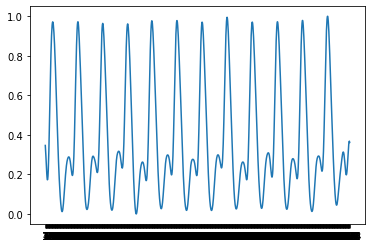

In [79]:
plt.plot(all_ppg_2_22.loc[54157])
print("cluster is ",cluster_labels[54157])

cluster is  4


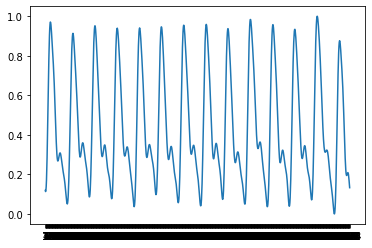

In [81]:
plt.plot(all_ppg_2_22.loc[131884])
print("cluster is ",cluster_labels[131884])

cluster is  5


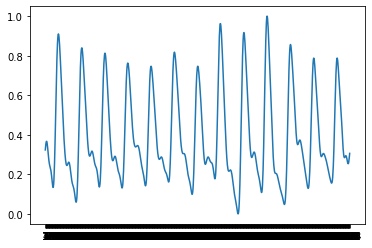

In [80]:
plt.plot(all_ppg_2_22.loc[139156])
print("cluster is ",cluster_labels[139156])